<a href="https://colab.research.google.com/github/ellaro/iris-knn-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


###Load and Explore the Iris Dataset

We use the built-in **Iris dataset** from `scikit-learn`, which contains 150 samples of iris flowers.  
Each sample includes 4 numerical features:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

Each flower is labeled with one of three species:

- 0 = Setosa
- 1 = Versicolor
- 2 = Virginica

We convert the dataset int


In [16]:
# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Define features (X) and labels (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print dataset shapes
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (120, 4)
Test set size: (30, 4)


In [18]:
# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Model Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualization

To better understand the distribution of the data, we created a scatter plot using the features **Petal Length** and **Petal Width**.

These two features provide a clear separation between the three iris species — Setosa, Versicolor, and Virginica.  
As we can see in the plot, Setosa is linearly separable from the other two, while Versicolor and Virginica are closer together.

This visualization helps illustrate why a simple classifier like **K-Nearest Neighbors** can perform well on this dataset.


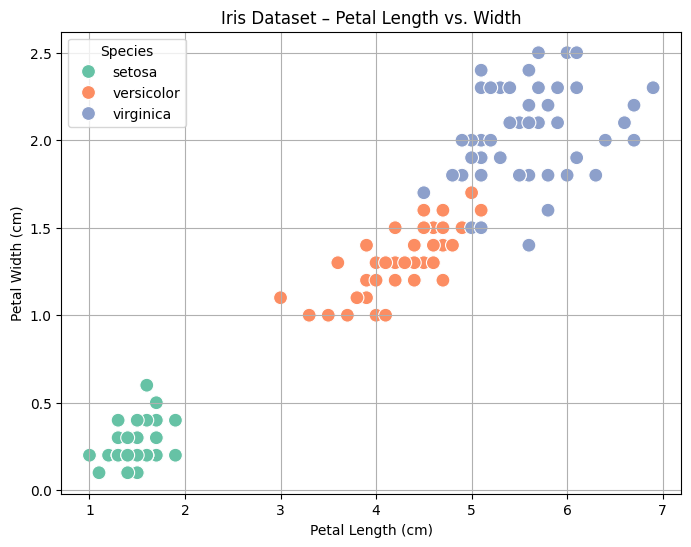

In [14]:

df_viz = df.copy()
df_viz['target_name'] = df_viz['target'].apply(lambda x: iris.target_names[x])

# Scatter Graph : petal length VS petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_viz,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='target_name',
    palette='Set2',
    s=100
)
plt.title('Iris Dataset – Petal Length vs. Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()
